# Pré-processamento

## Tokenização

Tokenização é o processo de quebrar o texto em sentenças ou palavras


In [1]:
import nltk
from collections import defaultdict, Counter
import math

# baixando o conteúdo
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('rslp')
nltk.download('machado')

from nltk.corpus import gutenberg
from nltk.corpus import machado

alice = gutenberg.raw(fileids='carroll-alice.txt')
len(machado.fileids())

[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/thiagodepaulo/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/thiagodepaulo/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to
[nltk_data]     /home/thiagodepaulo/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package machado to
[nltk_data]     /home/thiagodepaulo/nltk_data...
[nltk_data]   Package machado is already up-to-date!


246

In [8]:
len(alice)

144395

In [4]:
alice_sentences = nltk.sent_tokenize(text=alice)
alice_sentences[1]

"Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'"

In [ ]:
alice_sentences[1]

In [16]:
alice_words = nltk.word_tokenize(text=alice)
s = nltk.word_tokenize(text="oi,\ncomo vai? guarda-chuva")

print(s)
s="oi,\ncomo vai? guarda-chuva"
print(s.split())

['oi', ',', 'como', 'vai', '?', 'guarda-chuva']
['oi,', 'como', 'vai?', 'guarda-chuva']


## Normalização de texto

In [20]:
import string

import re
re.escape(string.punctuation)

'!"\\#\\$%\\&\'\\(\\)\\*\\+,\\-\\./:;<=>\\?@\\[\\\\\\]\\^_`\\{\\|\\}\\~'

In [21]:
import string
import re
string.punctuation

def remove_characters_1(tokens):
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub('', token) 
                                    for token in tokens])
    return filtered_tokens

def remove_characters_2(sentence, keep_apostrophes=False):
    sentence = sentence.strip()
    if keep_apostrophes:
        PATTERN = r'[?|$|&|*|%|@|(|)|~]' # add other characters here to remove them
        filtered_sentence = re.sub(PATTERN, r'', sentence)
    else:
        PATTERN = r'[^a-zA-Z0-9 ]' # only extract alpha-numeric characters
        filtered_sentence = re.sub(PATTERN, r'', sentence)
    return filtered_sentence

print(remove_characters_2("oi, como vai você, tudo bem?"))

oi como vai voc tudo bem


In [23]:
import string
import unicodedata

string.punctuation
normal = unicodedata.normalize('NFKD', u"oi, como vai você? éáÇaçaatareaçsdfjOlà").encode('ASCII', 'ignore')
print(normal)

b'oi, como vai voce? eaCacaatareacsdfjOla'


In [ ]:
import string
string.punctuation

## Remoção de stop-words

In [ ]:
def remove_stopwords(tokens, lang='english'):
    stopword_list = nltk.corpus.stopwords.words(lang)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens



In [26]:
nltk.corpus.stopwords.words('portuguese')

['de',
 'a',
 'o',
 'que',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera',
 'es

## Correção ortográfica pelo cálculo da distância de edição

Matematicamente, a distância de Levenshtein entre duas string $a$ e $b$ (de tamanho $|a|$ e $|b|$ respectivamente) é dado por $lev_{a,b}(|a|,|b|)$ onde

$$
{\displaystyle \qquad \operatorname {lev} _{a,b}(i,j)={\begin{cases}\max(i,j)&{\text{ if }}\min(i,j)=0,\\\min {\begin{cases}\operatorname {lev} _{a,b}(i-1,j)+1\\\operatorname {lev} _{a,b}(i,j-1)+1\\\operatorname {lev} _{a,b}(i-1,j-1)+1_{(a_{i}\neq b_{j})}\end{cases}}&{\text{ otherwise.}}\end{cases}}}
$$

Código para isso pode ser encontrado em http://norvig.com/spell-correct.html

In [ ]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

#correction('casa')
candidates('hause')

## Stemming

Processo de reduzir palavras flexionadas (ou às vezes derivadas) ao seu tronco (stem), base ou raiz, geralmente uma forma da palavra escrita. 

In [28]:
from nltk.stem import RSLPStemmer
pt_stemmer = RSLPStemmer()
print(pt_stemmer.stem("pulando"), 
      pt_stemmer.stem("pulos"), pt_stemmer.stem("pulado"), 
      pt_stemmer.stem("pulso"))

pul pul pul puls


In [31]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
print(ps.stem('pulando'), ps.stem('pulado'), ps.stem('jumped'))

pulando pulado jump


In [32]:
from nltk.stem import SnowballStemmer
pt_stemmer2 = SnowballStemmer('portuguese')
pt_stemmer2.stem('pulando')

'pul'

In [44]:
s=['oi, como vai você? tudo-bem está bem?\noi, tudo bem']

from preprocessor import StopWords
from preprocessor import Cleaner
from preprocessor import Stemmer

sw = StopWords()
sw.transform(s)

cl = Cleaner()
s = cl.transform(s)
print(s)

st = Stemmer()
print(st.transform(s))


[' como vai voce tudobem esta bemoi tudo bem']
['com vai voc tudob esta bemo tud bem']


In [ ]:
https://gitlab.com/thiagodepaulo/textunb

# Classificação

## Naive Bayes

> Exemplo: Imagine um "universo" que consiste em receber uma mensagem escolhida ao acaso entre todas as possíveis. Deixe $S$ ser o evento "a mensagem é spam" e $V$ ser o evento "a mensagem contém a palavra viagra". Logo, o Teorema de Bayes nos diz que a probabilidade de a mensagem ser spam depende de conter a palavra viagra:

$$
    p(S|V) = \frac{p(V|S)p(S)}{p(V|S)p(S) + p(V| \lnot S)p( \lnot S)}
$$

Testando exemplo do NaiveBayes na base SpamAssassin 

In [ ]:
def tokenize(message):
    return nltk.word_tokenize(text=message)

def count_words(training_set):
    counts = defaultdict(lambda: [0,0])
    for message, is_spam in training_set:
        for word in tokenize(message):
            counts[word][0 if is_spam else 1] += 1
    return counts

def word_probabilities(counts, total_spams, total_non_spams, k=0.5):
    return [(w, (spam + k)/(total_spams + 2*k), (non_spam + k)/(total_non_spams + 2*k)) 
            for w, (spam,non_spam) in counts.items()]

def spam_probability(word_probs, message):
    message_words = tokenize(message)
    log_prob_if_spam = log_prob_if_not_spam = 0.0
    
    for word, prob_if_spam, prob_if_not_spam in word_probs:
        if word in message_words:
            log_prob_if_spam += math.log(prob_if_spam)
            log_prob_if_not_spam += math.log(prob_if_not_spam)
        else:
            log_prob_if_spam += math.log(1.0 - prob_if_spam)
            log_prob_if_not_spam += math.log(1.0 - prob_if_not_spam)
    
    prob_if_spam = math.exp(log_prob_if_spam)
    prob_if_not_spam = math.exp(log_prob_if_not_spam)
    return prob_if_spam / (prob_if_spam + prob_if_not_spam)

class NaiveBayesClassifier:
    
    def __init__(self, k=0.5):
        self.k = k
        self.word_probs = []
        
    def train(self, training_set):
        num_spams = len([is_spam for message, is_spam in training_set if is_spam])
        num_non_spams = len(training_set) - num_spams
        
        word_counts = count_words(training_set)
        self.word_probs = word_probabilities(word_counts, num_spams, num_non_spams, self.k)
        
    def classify(self, message):
        return spam_probability(self.word_probs, message)

In [ ]:
import glob, re

data = []

for fn in glob.glob('spamassassin/*/*'):
    is_spam = 'ham' not in fn
    
    with open(fn,encoding="ISO-8859-1") as file:
        for line in file:
            if line.startswith("Subject:"):
                subject = re.sub(r"^Subject: ", "", line).strip()
                data.append((subject, is_spam))
    



In [ ]:
import random

def split_data(data, prob):
    results = [],[]
    for row in data:
        results[0 if random.random() < prob else 1].append(row)
    return results

random.seed(0)
train_data, test_data = split_data(data, 0.75)

classifier = NaiveBayesClassifier()
classifier.train(train_data)

classified = [(subject, is_spam, classifier.classify(subject)) for subject, is_spam in test_data]

counts = Counter((is_spam, spam_probability > 0.5) for _, is_spam, spam_probability in classified)

## Utilizando o scikit-learn

In [ ]:
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV    
from preprocessor import Preprocessor
from util import Loader
import pandas as pd
import logging
import sys
from sklearn.metrics import classification_report

s_dataset = '/exp/datasets/docs_rotulados/SyskillWebert-Parsed'

l = Loader()
d = l.from_files(s_dataset)

print(d.keys())
d['class_names']

pipe = Pipeline([('preprocessor',Preprocessor(lang='portuguese')),('count',CountVectorizer()),('classifier',MultinomialNB())])
pipe.fit(d['corpus'],d['class_index'])


In [ ]:
pipe.predict(['hi, goat'])

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB

D = d['corpus']
y = np.array(d['class_index'])

count_vect = CountVectorizer()
count_vect.fit(D)


In [ ]:
vectors = count_vect.transform(D)

In [ ]:
vectors = count_vect.transform(D)

clf = MultinomialNB()
clf.fit(vectors, y)



In [ ]:
doc='hi, goat is cool'
vec_exemplo = count_vect.transform([doc])

print(clf.predict(vec_exemplo))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, vectors, y, cv=10)
np.average(scores) 

# Modelos Probabilisticos de Topicos

## LSI

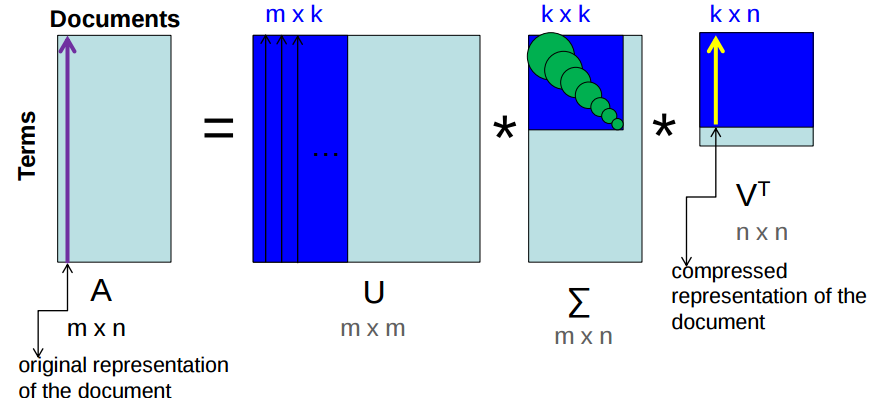

In [ ]:
from sklearn.pipeline import Pipeline
from preprocessor import Preprocessor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from tempfile import mkdtemp
from sklearn.externals.joblib import Memory
from util import Loader

def create_pipes(cache=False):
    steps = [('preprocessor',Preprocessor()), ('countvectorizer',CountVectorizer()), ('clf',LatentDirichletAllocation())]
    memory=None
    if cache:
        cachedir = mkdtemp()
        memory = Memory(cachedir=cachedir, verbose=10)        
    return Pipeline(steps, memory=memory) 

def get_top_words(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return topics


#parameters
s_dataset = '/exp/datasets/Discursos/discurso_*'
l = Loader()
d = l.from_files_2(s_dataset)

preproc = Preprocessor(lang='portuguese')
d = preproc.transform(d)

vect = CountVectorizer()
X = vect.fit_transform(d)

lda = LatentDirichletAllocation(n_components=100, learning_method='batch', max_iter=50)
lda.fit(X)
feature_names = vect.get_feature_names()
topics = get_top_words(lda, feature_names, 10)
print(topics)


In [ ]:
for k,topic in enumerate(topics):
    print("topico %s, %s" %(k,topic))

In [ ]:
import pandas as pd

df = pd.read_csv('sample.csv', header=None)
df[2]